In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "20"
os.environ["MKL_NUM_THREADS"] = "20"
os.environ["OPENBLAS_NUM_THREADS"] = "20"
os.environ["NUMEXPR_NUM_THREADS"] = "20"

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import classD_1dMFGTN
importlib.reload(classD_1dMFGTN)
from classD_1dMFGTN import classD_1dMFGTN


In [24]:
N = 32
mu_1, mu_2, t_1, t_2 = 1, 0, 0, 1
model = classD_1dMFGTN(N = N, DW=True, mu_1 = mu_1, mu_2 = mu_2, t_1=t_1, t_2=t_2)
res = model.run_adaptive_circuit(G_history=False, progress=True, cycles=10, postselect=False, samples=1, store="top", init_mode="random_pure", save=False)
Gss = res["steady_state"]
print(Gss.shape)

------------------------- classD_1d_MFGTN Initialized -------------------------


Adaptive circuit | N=32, cycles=10, nshell=None, DW=1, mu1=1.00, mu2=0.00, sigma=0.00:   0%|          | 0/320 …

KeyboardInterrupt: 

In [ ]:
# Run one adaptive cycle


# Born probabilities for (delocalized) DW unpaired modes after first cycle
p_init_dw = born_probs_at_dw(G_hist[-1], model, dw_loc)

# Sweep DW movement (local measurements) and track outcomes
G_hist_extended, outcomes, outcome_product, p_pos_list = sweep_and_append_history(model, G_hist, dw_loc)

# Born probabilities for DW modes after the sweep
p_final_dw = born_probs_at_dw(G_hist_extended[-1], model, dw_loc)

print("DW_Locs at:", dw_loc)
print("Outcome product (+1/-1):", outcome_product)
print("Per-step p_pos during sweep:", p_pos_list)
print("DW Born p_pos after first cycle:", p_init_dw)
print("DW Born p_pos after sweep:", p_final_dw)


------------------------- classD_1d_MFGTN Initialized -------------------------


Adaptive circuit | N=32, cycles=1, nshell=1, DW=1, mu1=1.00, mu2=0.00, sigma=0.00:   0%|          | 0/32 [00:0…

Total elapsed: 12.81 s
DW_Locs at: [10, 22]
Outcome product (+1/-1): -1
Per-step p_pos during sweep: [0.5000000000000002, 0.4999999999999998, 0.5000000000000003, 0.5000000000000002, 0.4999999999999996, 0.5000000000000004]
DW Born p_pos after first cycle: [9.992007221626409e-16, 0.999999999999999]
DW Born p_pos after sweep: [0.5000000000000002, 0.999999999999999]


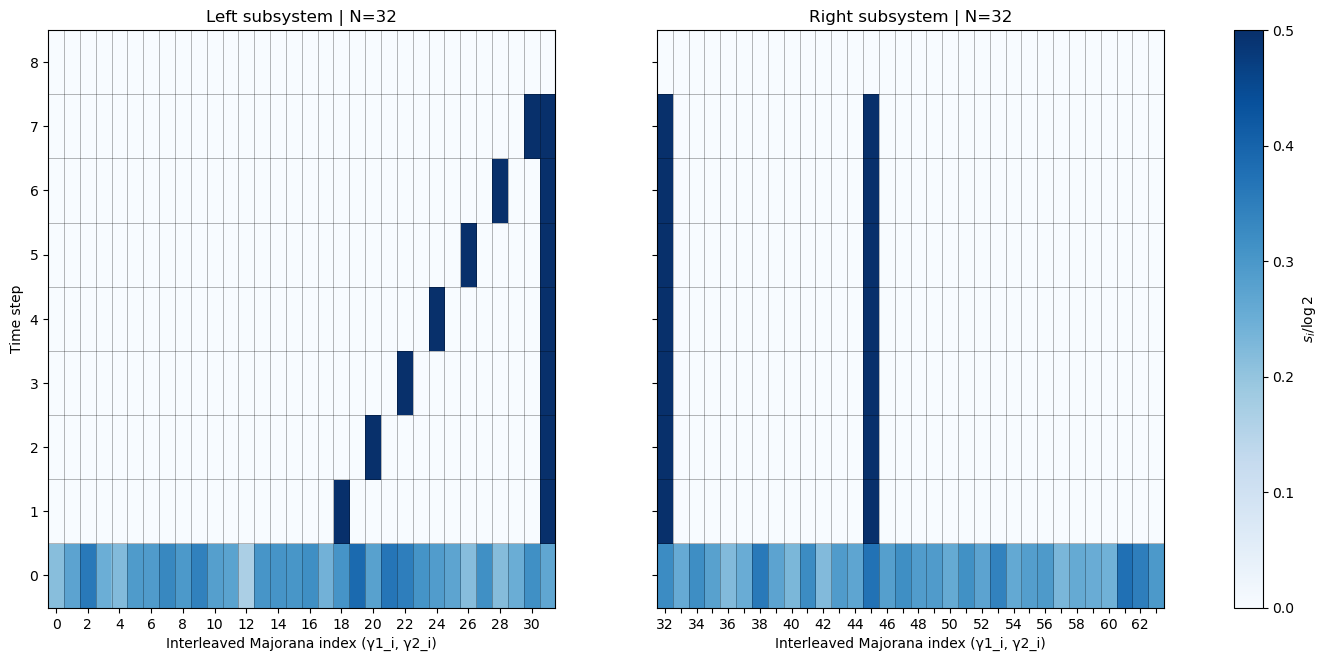

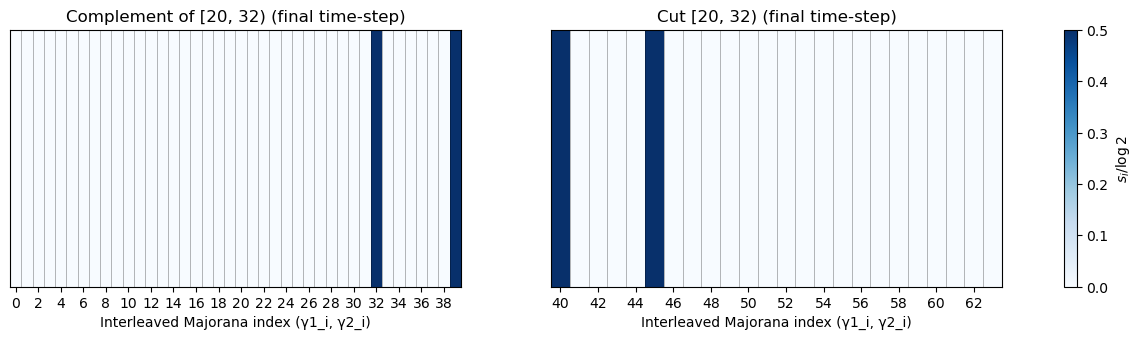

In [15]:

fig, ax, contour, fig2, ax2, contour2 = plot_entanglement_contour_heatmap(model, G_hist_extended)
